# Genilton Barbosa - 5153
---

## Importando as bibliotecas

In [1]:
import os

import numpy as np
from skimage import measure, util, color, morphology, filters, transform
from skimage.io import imread, imshow
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Randon Seed
random_state=393
# Remove abreviação do print
# np.set_printoptions(threshold=np.inf)

## Carregando as imagens do dataset

In [2]:
# Essa função foi implementada para padronizar o tamanho das imagens, mas percebeu-se que a precisão diminui, por isso não foi utilizada.
def resize_with_padding(image):
    height, width = image.shape
    
    if width > height:
        padding = int((width-height)//2)
        image = np.pad(image, pad_width=( (padding, padding), (0, 0)) )
    elif height > width:
        padding = int((height-width)//2)
        image = np.pad(image, pad_width=((0, 0), (padding, padding)) )
    
    image_resized = transform.resize(image, (300, 300), anti_aliasing=False)
        
    return image_resized

In [3]:
ds_path = 'data/Train'

# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(ds_path)

# Lista com as imagens no dataset
image_list = []

# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = imread(os.path.join(ds_path, classe, filename), as_gray=True)
        
        # Resize
        # img_temp = resize_with_padding(img_temp)
        
        # Padding - adicionado o padding pois em algumas imagens os objetos extrapolaram as bordas, o que causava um erro na fução que estrai as caracteristicas
        img_temp = np.pad(img_temp, pad_width=1)

        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

In [4]:
# Lista com os rótulos das imagens        
print(label_list)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

## Convertendo os nomes das classes para índices numéricos

In [5]:
# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

print(type(label_list_idx))
print(label_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

## Plotando as imagens do conjunto de dados

In [6]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]

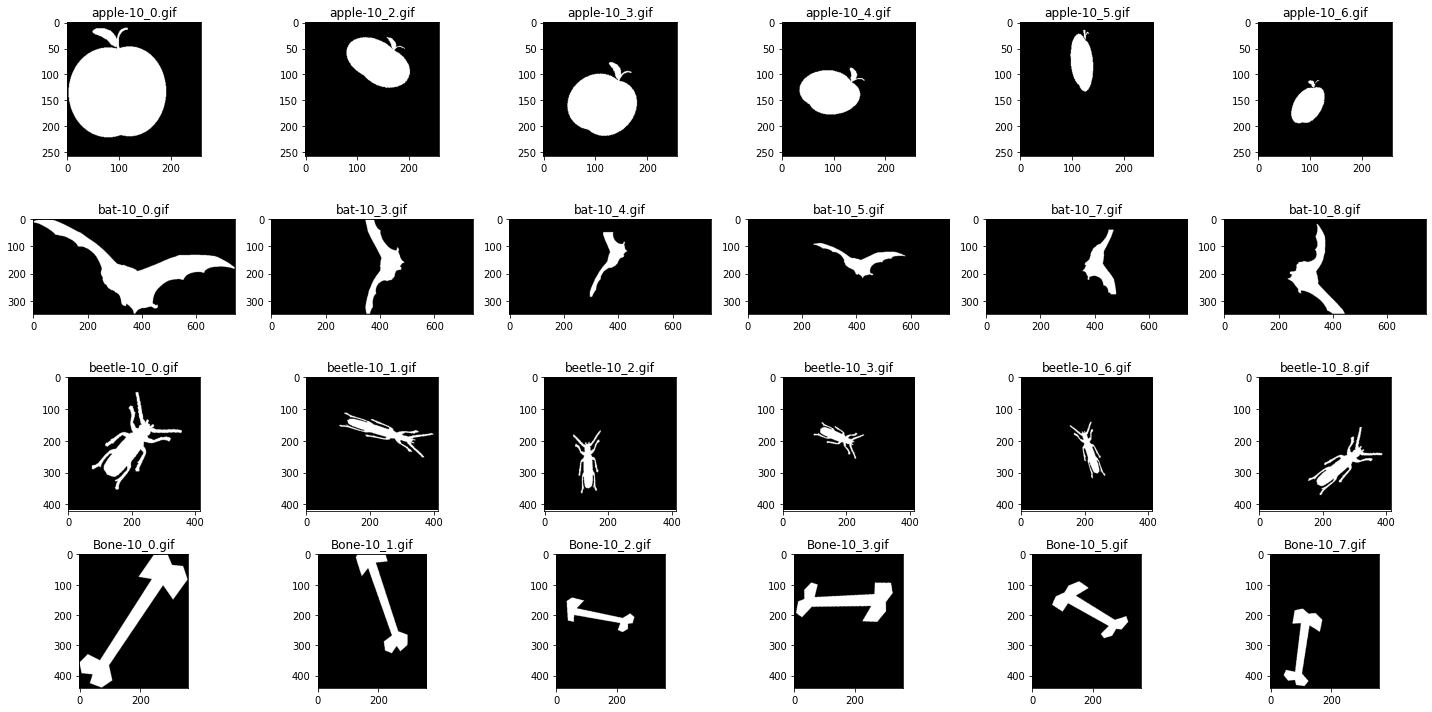

In [7]:
fig, ax = plt.subplots(4, 6, figsize=(20, 10))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))

fig.tight_layout()
plt.show()

## Extraindo as características das imagens

In [8]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']  # 'euler_number', 'equivalent_diameter_area', 'extent', 'minor_axis//major_axis'

# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    # print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float < filters.threshold_otsu(img_float)
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 10000)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        
        # euler_number=prop.euler_number
        # equivalent_diameter_area=prop.equivalent_diameter_area
        # extent=prop.extent

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

In [9]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
     print(feature_map)

[[ 38528.        354.6548    326.5506      0.5788      0.3901]
 [ 58139.        315.0294    304.5891      0.8734      0.2553]
 [ 53864.        325.1881    318.2968      0.8092      0.2048]
 ...
 [147519.        520.762     412.2721      0.9318      0.6109]
 [145518.        512.181     424.8969      0.9191      0.5584]
 [148405.        518.1822    417.3477      0.9374      0.5927]]


In [10]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[15542.       243.2761   156.3927     0.4345     0.0598]
[682193.       1049.1675    992.356       0.9842      0.9143]
[138562.6687    494.6435    393.0356      0.8747      0.4896]
[123215.1891    195.0629    153.8607      0.1045      0.2449]


## Normalizando as caracteristicas

In [11]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[138562.6687    494.6435    393.0356      0.8747      0.4896]
Desvio padrão:
[123215.1891    195.0629    153.8607      0.1045      0.2449]


In [12]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

print(feature_map_norm)

[[-0.81186962 -0.71765939 -0.43211184 -2.83166753 -0.40636479]
 [-0.65270905 -0.9208007  -0.57484845 -0.01240004 -0.95697142]
 [-0.68740444 -0.86872162 -0.4857569  -0.62697189 -1.16332754]
 ...
 [ 0.07268853  0.13389763  0.12502542  0.54599397  0.49537318]
 [ 0.05644865  0.08990702  0.20707857  0.42504839  0.28070972]
 [ 0.0798792   0.12067202  0.1580134   0.59954609  0.4209424 ]]


In [13]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[ 0.  0. -0.  0.  0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


### Plotando as caracteristicas computadas

In [14]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

### print(df)
display(df)

,area,major_axis,minor_axis,solidity,eccentricity,class
0,38528.0,354.654772,326.550621,0.578811,0.390138,apple
1,58139.0,315.029431,304.589071,0.873430,0.255311,apple
2,53864.0,325.188130,318.296757,0.809206,0.204780,apple
3,58777.0,315.417240,309.202056,0.883015,0.197537,apple
4,62878.0,306.339613,300.665585,0.944625,0.191575,apple
...,...,...,...,...,...,...
499,152878.0,515.610596,421.421996,0.965633,0.576175,bone
500,146641.0,511.244508,425.559455,0.926238,0.554177,bone
501,147519.0,520.761981,412.272133,0.931783,0.610948,bone
502,145518.0,512.181045,424.896887,0.919144,0.558383,bone


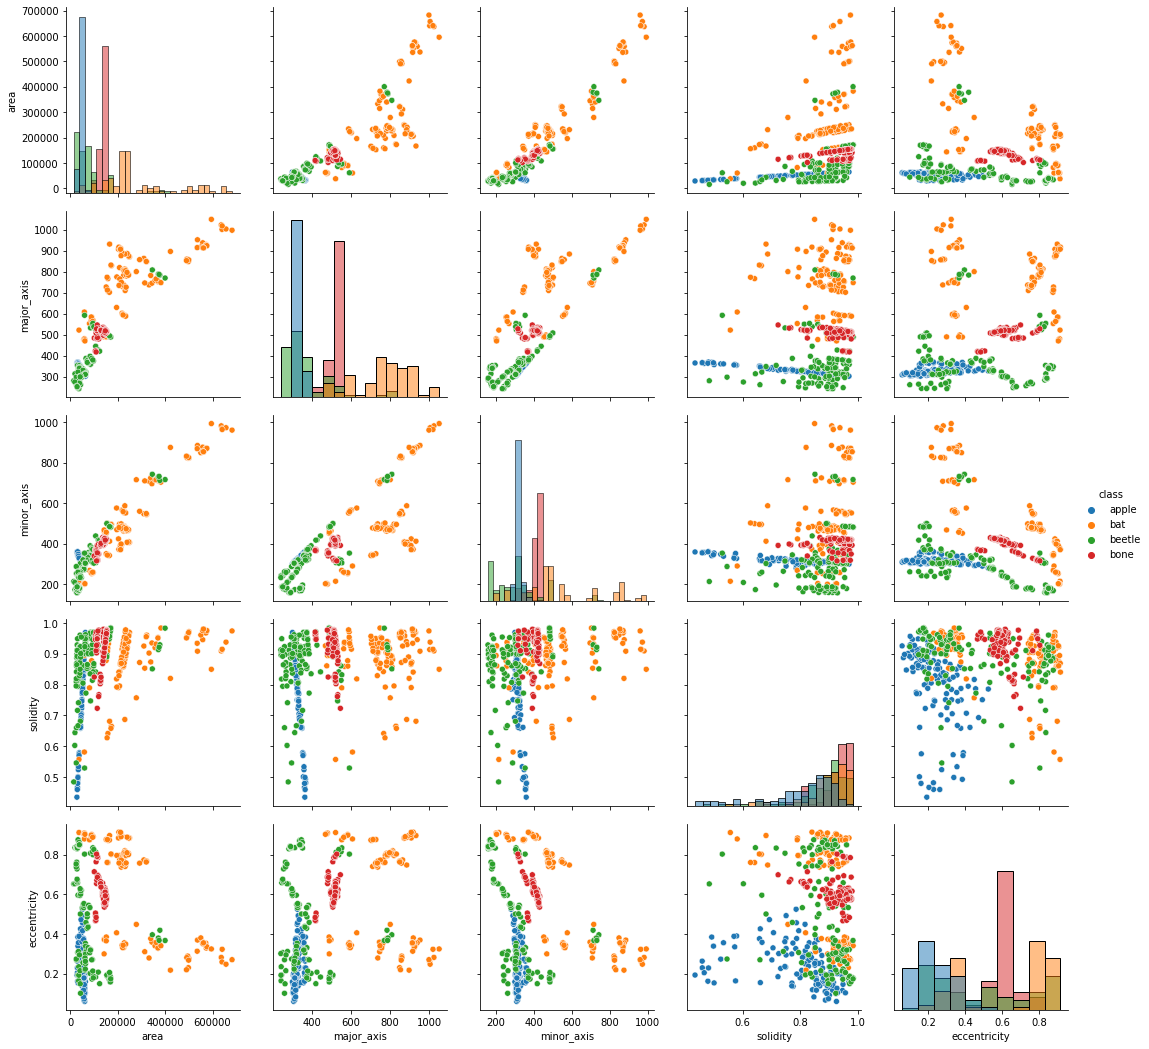

In [15]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(15, 15)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Plotando as caracteristicas computadas normalizadas

In [16]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)

df_norm['class'] = label_list

display(df_norm)

,area,major_axis,minor_axis,solidity,eccentricity,class
0,-0.811870,-0.717659,-0.432112,-2.831668,-0.406365,apple
1,-0.652709,-0.920801,-0.574848,-0.012400,-0.956971,apple
2,-0.687404,-0.868722,-0.485757,-0.626972,-1.163328,apple
3,-0.647531,-0.918813,-0.544867,0.079319,-1.192905,apple
4,-0.614248,-0.965349,-0.600349,0.668876,-1.217254,apple
...,...,...,...,...,...,...
499,0.116182,0.107489,0.184494,0.869906,0.353371,bone
500,0.065563,0.085106,0.211385,0.492925,0.263533,bone
501,0.072689,0.133898,0.125025,0.545994,0.495373,bone
502,0.056449,0.089907,0.207079,0.425048,0.280710,bone


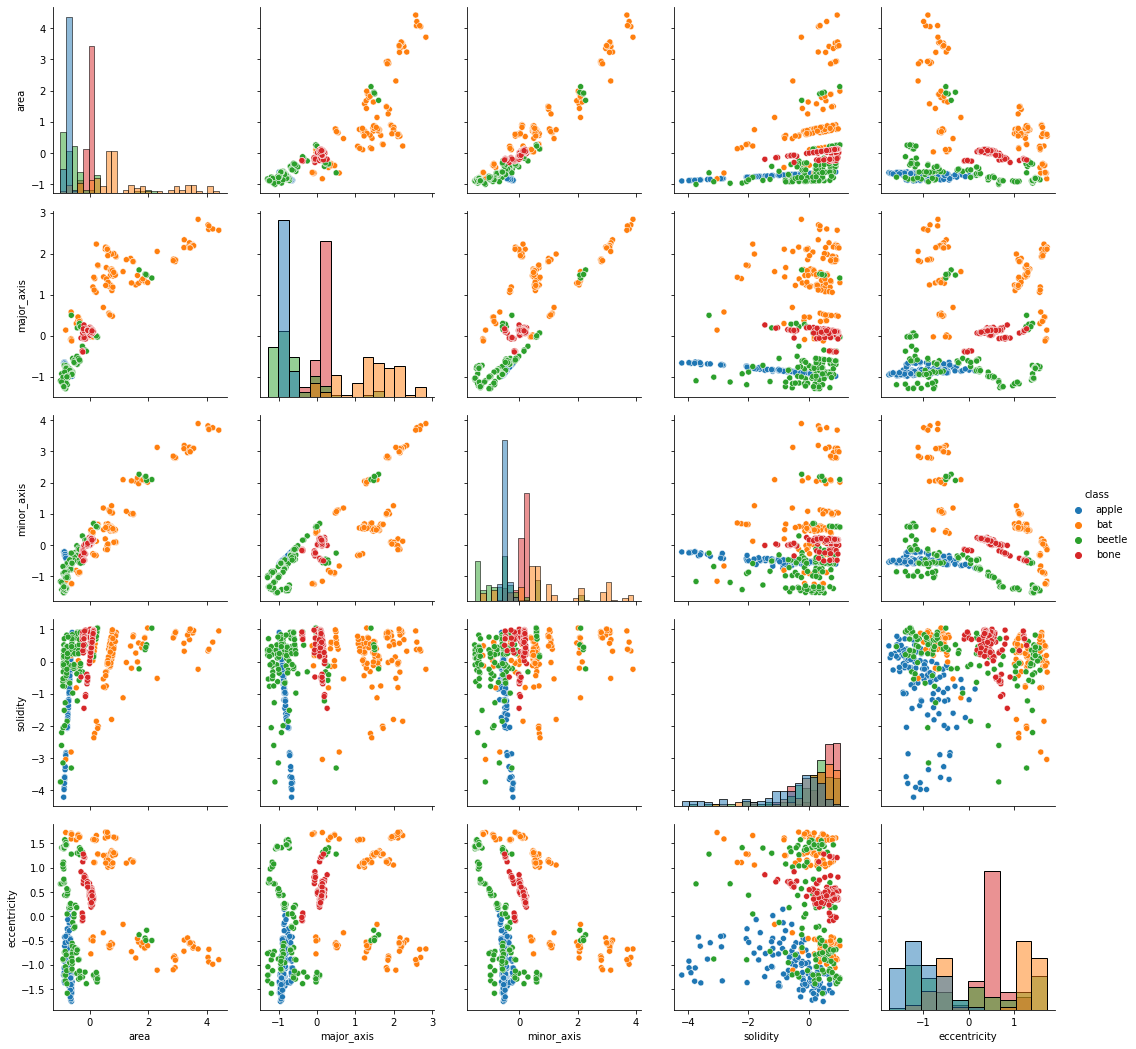

In [17]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(15, 15)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Validação cruzada - Hold-out
---

In [18]:
# Selecionamos 'area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity'
feature_map_ok = feature_map_norm


In [19]:
# Separa o conjunto de dados em 'feature_map_ok', de acordo com 'label_list'. 
# 10% das imagens vão para o conjunto de testes.
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_map_ok, label_list, test_size=0.1, random_state=random_state)

In [20]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[ 0.0166  0.0061  0.0217 -0.0223 -0.0161]
[1.0362 1.0108 1.0321 1.0193 0.9975]


In [21]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm)
    print(X_test_norm)

[[ 0.5707  2.1032 -0.1002  0.0031  1.731 ]
 [ 0.091   0.1079  0.1552  0.8368  0.3887]
 [-0.2066  0.1249 -0.4943  0.7176  1.2533]
 ...
 [ 0.0967  0.1028  0.1563  0.8796  0.3775]
 [-0.4327 -0.6821 -0.3383  0.781  -0.688 ]
 [ 0.6738  1.1773  0.5616  0.366   1.0618]]
[[-0.6052 -0.8759 -0.5513  0.2504 -0.784 ]
 [ 0.5808  1.9284  0.0087  0.0527  1.6593]
 [ 0.7161  1.0879  0.5074  0.5696  1.0455]
 [ 0.7318  0.468   0.9739  0.9887 -0.5574]
 [-0.5372 -0.6068 -0.4259 -0.1281  0.002 ]
 [ 0.0566  0.1478  0.1436  0.5765  0.4764]
 [-0.5093 -0.6554 -0.4165  0.2702 -0.2105]
 [-0.6435 -0.9102 -0.5296  0.0536 -1.3313]
 [-0.6195 -0.9472 -0.5593  0.4862 -1.5829]
 [ 0.859   1.8977  0.0563  0.9091  1.6341]
 [-0.2569 -0.257   0.26   -0.2926 -1.2393]
 [-0.58   -0.8821 -0.571   0.6794 -0.7059]
 [-0.7739 -0.9817 -0.9656 -0.3319  0.4461]
 [ 0.032   0.1613  0.1535  0.39    0.4821]
 [ 0.0874  0.0918  0.1625  0.809   0.3463]
 [-0.617  -0.9512 -0.5651  0.5314 -1.5662]
 [-0.4025  0.4495 -0.883  -0.1177  1.6914]
 [ 0.

## Classificando usando K-vizinhos mais próximos
---

In [22]:
# Constrói um classificador do tipo K-NN
# K = 3
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador
pred = clf.predict(X_test_norm)

## Avaliando o modelo
---

In [23]:
# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['apple' 'bat' 'bat' 'bat' 'beetle' 'bone' 'beetle' 'apple' 'apple' 'bat'
 'beetle' 'beetle' 'beetle' 'bone' 'bone' 'apple' 'bat' 'bone' 'bone'
 'apple' 'bone' 'bat' 'bat' 'bat' 'apple' 'beetle' 'apple' 'beetle' 'bone'
 'beetle' 'bat' 'bat' 'beetle' 'bone' 'bone' 'bone' 'apple' 'beetle'
 'apple' 'bone' 'bat' 'bone' 'bone' 'apple' 'beetle' 'beetle' 'bat' 'bone'
 'beetle' 'bat' 'beetle']

Real:
['beetle', 'bat', 'bat', 'bat', 'beetle', 'bone', 'beetle', 'apple', 'apple', 'bat', 'beetle', 'beetle', 'beetle', 'bone', 'bone', 'apple', 'bat', 'bone', 'bone', 'apple', 'bone', 'bat', 'bat', 'bat', 'beetle', 'beetle', 'apple', 'beetle', 'bone', 'beetle', 'bat', 'bat', 'beetle', 'bone', 'bone', 'bone', 'apple', 'beetle', 'apple', 'bone', 'bat', 'bone', 'bone', 'apple', 'beetle', 'beetle', 'bat', 'bone', 'beetle', 'bat', 'beetle']

Acerto/Erro:
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Matriz de confusão e o relatório de treinamento

In [24]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[ 8  0  0  0]
 [ 0 13  0  0]
 [ 2  0 14  0]
 [ 0  0  0 14]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.80      1.00      0.89         8
         bat       1.00      1.00      1.00        13
      beetle       1.00      0.88      0.93        16
        bone       1.00      1.00      1.00        14

    accuracy                           0.96        51
   macro avg       0.95      0.97      0.96        51
weighted avg       0.97      0.96      0.96        51



## Otimizando hiperparametros com o conjunto de validação
---

In [25]:
# Selecionamos todas caracteristicas
feature_map_ok = feature_map

In [26]:
# Separa 20% do conjuto de completo para TESTES. 80% para treinamento 1.
X_train_1, X_test, y_train_1, y_test = model_selection.train_test_split(feature_map_ok, 
                                                                        label_list, 
                                                                        test_size=0.2, 
                                                                        stratify=label_list,
                                                                        random_state=random_state)

In [27]:
# Separa 25% do conjuto de treinamento 1 para validação.
#   -> Equivale a 20% do conjunto completo. 0,2 / 0,8 = 0,25
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.25, 
                                                                      stratify=y_train_1,
                                                                      random_state=random_state)

### Normalizando as caracteristicas
* Obtemos uma estimativa da média e do desvio padrão dos dados a partir do conjunto de treino.

In [28]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[146035.5596    498.7571    400.5716      0.8811      0.4783]
[134607.7727    201.4817    162.9854      0.0996      0.243 ]


In [29]:
# Transformada Normal de Caracteristicas (Sklearn)

scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [146035.5596    498.7571    400.5716      0.8811      0.4783]
Desv. pad.: 	 [134607.7727    201.4817    162.9854      0.0996      0.243 ]


In [30]:
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 -0.0000 ± 1.0000
Validação: 	 -0.0520 ± 0.9687
Teste:   	 -0.0874 ± 0.9196


### Otimizando o valor de *k*
* Vamos encontrar o melhor valor de k para o K-means em termos de acurácia.
* Vamos testar os seguintes valores de 'k': 1, 3, 5, 7 e 9.

In [31]:
k_list = [1, 3, 5, 7, 9]

# Lista com as acurácias de traino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_2_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_2_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  

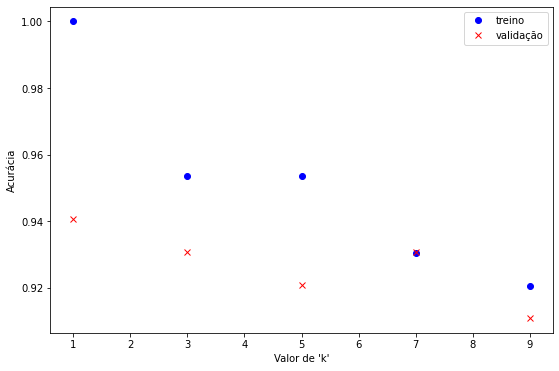

In [32]:
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [33]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
1 	 1.0000 	 0.9406
3 	 0.9536 	 0.9307
5 	 0.9536 	 0.9208
7 	 0.9305 	 0.9307
9 	 0.9205 	 0.9109

Melhor 'k': 1 (0.9406 acc.)


### Testando o melhor selecionado com o conjunto de testes

In [34]:
# Constrói um classificador K-NN. K = k_best
clf_final = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf_final.fit(X_train_2_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf_final.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

In [35]:
print('\nO melhor valor de k:', k_best)

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


O melhor valor de k: 1

Matriz de confusão:
[[24  0  1  0]
 [ 0 25  0  0]
 [ 2  0 23  0]
 [ 0  0  0 26]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.92      0.96      0.94        25
         bat       1.00      1.00      1.00        25
      beetle       0.96      0.92      0.94        25
        bone       1.00      1.00      1.00        26

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



# Validação
---

In [36]:
ds_validation_path = 'data/Test'

# Lista das pastas na pasta 'ds_path' (classes)
classes_list_validation = os.listdir(ds_validation_path)

# Lista com as imagens no dataset
image_list_validation = []

# Lista com os rótulos das imagens
label_list_validation = []

# Lista com os nomes das imagens
filename_list_validation = []

# Percorre as classes do dataset
for classe in classes_list_validation:
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_validation_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = imread(os.path.join(ds_validation_path, classe, filename), as_gray=True)
        
        # Resize
        # img_temp = resize_with_padding(img_temp)
        
        # Padding - adicionado o padding pois em algumas imagens os objetos extrapolaram as bordas, o que causava um erro na fução que estrai as caracteristicas
        img_temp = np.pad(img_temp, pad_width=1)

        # Adiciona a imagem a lista de imagens
        image_list_validation.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_validation.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_validation.append(filename)

## Extraindo as características das imagens de validação

In [37]:
# Nomes das caracteristicas computadas
features_validation = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']

# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat_validation = []

# Lista com as imagens segmentadas (binárias)
seg_list_validation = []

# Lista com os rótulos das imagens
list_label_validation = []

for i, (image, label) in enumerate(zip(image_list_validation, label_list_validation)):
    # DEBUG
    # print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label_validation.append(label)
    
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float < filters.threshold_otsu(img_float)
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 10000)
    
    # Adiciona a imagem segmentada à lista.
    seg_list_validation.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        
        # euler_number=prop.euler_number
        # equivalent_diameter_area=prop.equivalent_diameter_area
        # extent=prop.extent

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat_validation.append(feature_list)

In [38]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map_validation = np.array(feature_mat_validation)

In [39]:
# Transformada Normal de Caracteristicas
feature_map_validation_norm = (feature_map_validation - feature_map_validation.mean(0)) / feature_map_validation.std(0)

# Selecionamos 'area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity'
feature_map_validation_ok = feature_map_validation_norm


## Avaliando o modelo
---

In [40]:
# Testando o classificador
prediction = clf_final.predict(feature_map_validation_ok)

# Acertos
acertos = label_list_validation == prediction

print('\n Predição:')
print(prediction)
print('\nReal:')
print(label_list_validation)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'beetle'
 'beetle' 'beetle' 'beetle' 'bat' 'bat' 'bat' 'bat' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'

### Matriz de confusão e o relatório de Validação

In [41]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(label_list_validation, prediction))

print('\nRelatório de classificação:')
print(metrics.classification_report(label_list_validation, prediction))


Matriz de confusão:
[[54  0  0  0]
 [ 0 50  4  0]
 [ 4  0 50  0]
 [ 0  0  2 52]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.93      1.00      0.96        54
         bat       1.00      0.93      0.96        54
      beetle       0.89      0.93      0.91        54
        bone       1.00      0.96      0.98        54

    accuracy                           0.95       216
   macro avg       0.96      0.95      0.95       216
weighted avg       0.96      0.95      0.95       216

